In [1]:
#load and preprocess
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

#load data
path = "Digits/ZipDigits.train"
df = pd.read_csv(path, delimiter=" ")

#preprocess
names = [str(i) for i in range(258)]
names[0] = 'value'
df.columns=names
df = df.drop(labels='257', axis=1)

#get data of 1 and 5
df1 = df.query("value == 1")
df5 = df.query("value == 5")



In [2]:
#symmetry
def calc_sym(df):
        
    r, c = df.shape
    symmetry_list = [[0] for _ in range(r)]
    for j in range(r):

        get_gray = [[0]*16 for _ in range(16)]

        for i in range(256):
            x = i // 16
            y = i % 16
            gray = df.iloc[j,i+1] + 1
            get_gray[x][y] = gray


        x_symmetry = 0
        y_symmetry = 0

        for i in range(256):

            x = i // 16
            y = i % 16
            gray = df.iloc[j,i+1] + 1

            gray_sym_x = get_gray[15-x][y]
            x_symmetry += abs((gray - gray_sym_x)) #这里计算出来的是不对称度

            gray_sym_y = get_gray[x][15-y]
            y_symmetry += abs((gray - gray_sym_y))

        #归一化
        x_symmetry = (1- x_symmetry/512)
        y_symmetry = (1- y_symmetry/512)
        symmetry_list[j] = 0.5 * (x_symmetry+y_symmetry)
    symmetry_list = pd.core.frame.DataFrame(symmetry_list)
    return symmetry_list

symmetry_1 = calc_sym(df1)
symmetry_5 = calc_sym(df5)


In [3]:
#intensity
def calc_intensity(df):
    r, c = df.shape
    sum_row = [0 for _ in range(r)]
    for j in range(r):
        for i in range(256):
            sum_row[j] += df.iloc[j,i+1] + 1
        sum_row[j] /= 512
    sum_row = pd.core.frame.DataFrame(sum_row)
    return sum_row
intensity_1 = calc_intensity(df1)
intensity_5 = calc_intensity(df5)

[[0.12304297 0.95575781]
 [0.11385938 0.94178906]
 [0.11537109 0.975875  ]
 ...
 [0.19510352 0.92387891]
 [0.1688457  0.96360937]
 [0.2762207  0.94273438]]
[[0.44413086 0.65644922]
 [0.21798242 0.79002344]
 [0.304      0.73744141]
 ...
 [0.36796094 0.64625   ]
 [0.35529297 0.70732813]
 [0.23288086 0.72351172]]


Text(0, 0.5, 'symmetry')

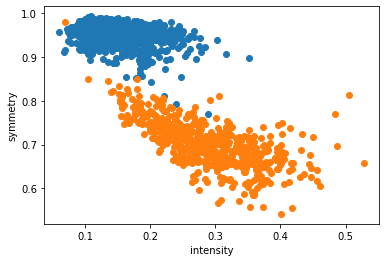

In [10]:
#combine and plot
X_1 = np.column_stack((intensity_1, symmetry_1))
print(X_1)

X_5 = np.column_stack((intensity_5, symmetry_5))
print(X_5)

#plot

plt.scatter(X_1[:,0],X_1[:,1])
plt.scatter(X_5[:,0],X_5[:,1])
plt.xlabel("intensity")
plt.ylabel("symmetry")
